In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_excel("/content/gdrive/MyDrive/감정분석 chat -bot/emotional_Training.xlsx")

In [ ]:
train.head(10)

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,5,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN
5,6,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에 다니고 있지만 시간만 버리는 거 같아. 진지하게 진로에 대한 고민이 생겨.,진로에 대해서 고민하고 계시는군요. 어떤 점이 고민인가요?,직장 상사한테 자주 지적을 받아. 그럴 때마다 이 업무는 나랑 맞지 않는 거 같이 ...,업무가 나와 맞지 않아 시간을 버리는 것 같이 느껴지셨군요.,NaN,NaN
6,7,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔. 나도 섭섭해.,부모님의 노여움에 섭섭하시군요. 이런 상황을 어떻게 해결하면 좋을까요?,부모님께 좀 더 시간을 달라고 해야겠어. 진로 테스트를 받아볼까 생각 중이야.,진로 테스트를 받아보겠다고 부모님께 말씀드릴 생각이군요.,NaN,NaN
7,8,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,천천히라도 직장을 구해 보려고 하시는군요. 특별한 이유가 있으신가요?,더 좋은 회사가 기다리고 있을지도 모르는데 쉬고 있기가 좀 그래.,좋은 일자리를 놓치고 싶지 않아 끊임없이 노력하시는군요. 하는 일이 잘 풀리시길 바라요.,NaN,NaN
8,9,청년,여성,"진로,취업,직장",해당없음,불안,걱정스러운,졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어.,취업에 대해 걱정이 되는군요.,응. 느긋함을 느끼는 내가 좀 싫었는데 걱정을 많이 하는 것보다는 낫다는 생각도 들어.,걱정보다는 느긋한 태도가 낫다고 생각하시는군요.,NaN,NaN
9,10,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,요즘 직장생활이 너무 편하고 좋은 것 같아!,직장생활이 편하고 좋으시다니 좋아 보여요. 다니고 계신 회사만의 장점이 있나요?,우리 회사는 복지가 정말 좋아! 내가 곧 출산하게 되는데 육아휴직 기간도 긴 데다가...,예비 엄마들에게는 정말 꿈의 회사인 것 같네요. 마음이 편하시겠어요.,NaN,NaN


In [ ]:
# 필요없는 컬럼 제거
train.drop(labels = ['Unnamed: 0','연령','성별','상황키워드','신체질환','감정_소분류','시스템문장1','사람문장2','시스템문장2','사람문장3','시스템문장3'], axis=1, inplace = True)
print(train)

      감정_대분류                                              사람문장1
0         분노                          일은 왜 해도 해도 끝이 없을까? 화가 난다.
1         분노     이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.
2         분노  회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...
3         분노  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...
4         분노              얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.
...      ...                                                ...
51625     분노     나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.
51626     불안        몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.
51627     상처   이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.
51628     불안  몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.
51629     상처  남편과 결혼한 지 사십 년이야. 이제 사람 만나는 것도 버겁고 알던 사람도 점점 사라져.

[51630 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
result = le.fit_transform(train['감정_대분류'])
print(result)

[2 2 2 ... 4 3 4]


In [ ]:
import numpy as np

train['emotional'] = np.where(train['감정_대분류'] == '기쁨', 1, 0)
print(train)

      감정_대분류                                              사람문장1  emotional
0         분노                          일은 왜 해도 해도 끝이 없을까? 화가 난다.          0
1         분노     이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.          0
2         분노  회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...          0
3         분노  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...          0
4         분노              얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.          0
...      ...                                                ...        ...
51625     분노     나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.          0
51626     불안        몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.          0
51627     상처   이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.          0
51628     불안  몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.          0
51629     상처  남편과 결혼한 지 사십 년이야. 이제 사람 만나는 것도 버겁고 알던 사람도 점점 사라져.          0

[51630 rows x 3 columns]


In [ ]:
train.drop(labels = ['감정_대분류'], axis=1, inplace = True)
print(train)

                                                   사람문장1  emotional
0                              일은 왜 해도 해도 끝이 없을까? 화가 난다.          0
1         이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.          0
2      회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...          0
3      직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...          0
4                  얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.          0
...                                                  ...        ...
51625     나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.          0
51626        몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.          0
51627   이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.          0
51628  몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.          0
51629  남편과 결혼한 지 사십 년이야. 이제 사람 만나는 것도 버겁고 알던 사람도 점점 사라져.          0

[51630 rows x 2 columns]


In [ ]:
type(train)

pandas.core.frame.DataFrame

In [ ]:
train2 = pd.read_csv("/content/gdrive/MyDrive/감정분석 chat -bot/add_data (2).csv", encoding='cp949')

In [ ]:
train2.head(50)

,사람문장1,emotional
0,이쁩니다 친구거는 캐나다 사고 전 영국거 ㅤㅅㅣㅆ는데 캐나다 거가 더 이쁜거 같네요...,1
1,어제 배송 도착 해서 오늘 사용 했는데 아침 출근때 부터 퇴근한 지금 까지도 계속 ...,1
2,상품평 날아가서 다시 씀 ㅜㅜ 일단 너무 좋음 편백나무 향이 온방안에 나서 숲속온듯...,1
3,60포 짜리 살려다 먹어보고 사려고 작은 걸로 주문 했어요 포장도 꼼꼼하니 좋아요 ...,1
4,삼촌 부탁으로 주문했는데 일단 가루제품이라 우유나 꿀에 타서 드시는데 드실만 하다고...,1
5,오자마자 사용했는데 인그로운이 있던 쪽이 가려워서 잠결에 긁었는지 제품이 닿자마자 ...,1
6,심플하니 좋아요 취향상 아기자기한것보다 심플한걸 찾아서 구매했는데 만족해요 ㅋ 그리...,1
7,재구매 두번째 구매에요 ㅎㅎ신랑이랑 너무 맛있게 먹어서 날씨도 춥고 하니까 더 생각...,1
8,상품평들이 좋아서 구입했는데 아주 맘에 들어요 잡을때도 불편함 없이 잘 잡히고요 스...,1
9,혼자 뚜벅이여행 계획잡고 갔는데 뚜벅이하면 엄청 고생한다는 말만 들어서 두려운 상태...,1


In [ ]:
df = pd.concat([train,train2])

In [ ]:
df.tail(6)

,사람문장1,emotional
39372,자주 쓰는 제품인데 여기서 사니 더 저렴해요,1
39373,너무 만족합니다 정말 유용하게 쓰고 있습니다,1
39374,재구매 매번 꼼꼼하게 배송해주셔서 감사합니다,1
39375,재구매 너무 맛있고 효과있어서 계속 먹습니다,1
39376,디자인이랑 향이 마음에 들어서 또 주문했어요,1
39377,5개나 주문했어요 ㅋㅋㅋㅋ 짱짱해서 좋아용,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91008 entries, 0 to 39377
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   사람문장1      91008 non-null  object
 1   emotional  91008 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [ ]:
print('긍정 말뭉치 갯수: {}'.format(train['emotional'].value_counts()[1]))
print('부정 말뭉치 갯수: {}'.format(train['emotional'].value_counts()[0]))

긍정 말뭉치 갯수: 6126
부정 말뭉치 갯수: 45504


In [ ]:
print('긍정 말뭉치 갯수: {}'.format(df['emotional'].value_counts()[1]))
print('부정 말뭉치 갯수: {}'.format(df['emotional'].value_counts()[0]))

긍정 말뭉치 갯수: 45504
부정 말뭉치 갯수: 45504


In [ ]:
# !pip install konlpy

In [ ]:
import re
import json
# from konlpy.tag import Kkma, Komoran, Okt, Twitter
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# from konlpy.tag import Twitter

In [ ]:
# twitter = Twitter()

In [ ]:
# tokenizer = Twitter()

In [ ]:
# txt='안녕 너무 데이터 전처리 너무 힘들다'

In [ ]:
# print(tokenizer.morphs(txt))

In [ ]:
# print(list(txt))

### 단어 집합 (Vocabulary) 생성

In [ ]:
# import urllib.request
import pandas as pd
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df[39371:39380]

,사람문장1,emotional
39371,남편이 죽고 나니 경제적으로 여유가 없어.,0
39372,오늘 월급날인데 못 받았어 회사 사정이 안 좋아서 다음 달에 같이준대. 돈 쓸 곳도...,0
39373,요즘에는 만나서 이야기 나눌 수 있는 친구들이 별로 없는 것 같아. 내가 대화가 안...,0
39374,남편은 항상 날 위하지 않아. 남들은 아내 말만 듣는데 우리 남편은 안 그래.,0
39375,친구들과 만났는데 모두 노인 연금을 들었거나 연금을 받는다는 이야기를 듣고 나는 뭐...,0
39376,노래 교실에 갔는데 친구가 학교에 다녀본 적이 없다는 거야.,0
39377,밖에 나가서 산책도 하고 싶고 친구들도 만나고 싶고 쇼핑도 하고 싶은데 아무것도 할...,0
39378,요즘은 기억이 안 나서 물건을 어디다 놓고는 못 찾아.,0
39379,남편이 이렇게 빨리 세상을 떠날 줄이야. 나 때문에 명이 더 짧아졌는지도 몰라.,0


In [ ]:
print('전체 샘플의 수 : {}'.format(len(df)))

전체 샘플의 수 : 91008


In [ ]:
sample_data = df[:91007]

In [ ]:
sample_data['사람문장1'] = sample_data['사람문장1'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]', '')

<ipython-input-30-e7d1c1da2dd6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_data['사람문장1'] = sample_data['사람문장1'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]', '')
<ipython-input-30-e7d1c1da2dd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['사람문장1'] = sample_data['사람문장1'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]', '')


In [ ]:
sample_data[39370:39390]

,사람문장1,emotional
39370,퇴직하고 할 일이 없으니 잠만 자게 되네 병원에 갔더니 우울증이래,0
39371,남편이 죽고 나니 경제적으로 여유가 없어,0
39372,오늘 월급날인데 못 받았어 회사 사정이 안 좋아서 다음 달에 같이준대 돈 쓸 곳도 ...,0
39373,요즘에는 만나서 이야기 나눌 수 있는 친구들이 별로 없는 것 같아 내가 대화가 안 통하나,0
39374,남편은 항상 날 위하지 않아 남들은 아내 말만 듣는데 우리 남편은 안 그래,0
39375,친구들과 만났는데 모두 노인 연금을 들었거나 연금을 받는다는 이야기를 듣고 나는 뭐...,0
39376,노래 교실에 갔는데 친구가 학교에 다녀본 적이 없다는 거야,0
39377,밖에 나가서 산책도 하고 싶고 친구들도 만나고 싶고 쇼핑도 하고 싶은데 아무것도 할...,0
39378,요즘은 기억이 안 나서 물건을 어디다 놓고는 못 찾아,0
39379,남편이 이렇게 빨리 세상을 떠날 줄이야 나 때문에 명이 더 짧아졌는지도 몰라,0


In [ ]:
# 불용어 제거
stopwords = ['않다','되어다','되다','하다','어떻다','이렇다','이다','어제','매일',
             '아휴','아이구','아이쿠','아이고','어','나','우리','저희','따라','의해',
             '을','를','에','의','가','으로','로','에게','뿐이다','의거하여','근거하여',
             '입각하여','기준으로','예하면','예를 들면','예를 들자면','저','소인','소생','저희','지말고','하지마','하지마라','다른','물론','또한','그리고','비길수 없다','해서는 안된다','뿐만 아니라','만이 아니다'
             ,'만은 아니다','막론하고','관계없이','그치지 않다','그러나','그런데','하지만','든간에','논하지 않다','따지지 않다','설사','비록','더라도','아니면','만 못하다','하는 편이 낫다','불문하고','향하여'
             ,'향해서','향하다','쪽으로','틈타','이용하여','타다','오르다','제외하고','이 외에','이 밖에','하여야','비로소','한다면 몰라도','외에도','이곳','여기','부터','기점으로','따라서','할 생각이다','하려고하다'
             ,'이리하여','그리하여','그렇게 함으로써','하지만','일때','할때','앞에서','중에서','보는데서','으로써','로써','까지','해야한다','일것이다','반드시','할줄알다','할수있다','할수있어','임에 틀림없다','한다면'
             ,'등','등등','제','겨우','단지','다만','할뿐','딩동','댕그','대해서','대하여','대하면','훨씬','얼마나','얼마만큼','얼마큼','남짓','여','얼마간','약간','다소','좀','조금','다수','몇','얼마'
             ,'지만','하물며','또한','그러나','그렇지만','하지만','이외에도','대해 말하자면','뿐이다','다음에','반대로','반대로 말하자면','이와 반대로','바꾸어서 말하면','바꾸어서 한다면','만약','그렇지않으면'
             ,'까악','툭','딱','삐걱거리다','보드득','비걱거리다','꽈당','응당','해야한다','에 가서','각','각각','여러분','각종','각자','제각기','하도록하다','와','과','그러므로','그래서','고로','한 까닭에'
             ,'하기 때문에','거니와','이지만','대하여','관하여','관한','과연','실로','아니나다를가','생각한대로','진짜로','한적이있다','하곤하였다','하','하하','허허','아하','거바','와','오','왜','어째서','무엇때문에'
             ,'어찌','하겠는가','무슨','어디','어느곳','더군다나','하물며','더욱이는','어느때','언제','야','이봐','어이','여보시오','흐흐','흥','휴','헉헉','헐떡헐떡','영차','여차','어기여차','끙끙','아야','앗','아야'
             ,'콸콸','졸졸','좍좍','뚝뚝','주룩주룩','솨','우르르','그래도','또','그리고','바꾸어말하면','바꾸어말하자면','혹은','혹시','답다','및','그에 따르는','때가 되어','즉','지든지','설령','가령','하더라도'
             ,'할지라도','일지라도','지든지','몇','거의','하마터면','인젠','이젠','된바에야','된이상','만큼','어찌됏든','그위에','게다가','점에서 보아','비추어 보아'
             , '고려하면','하게될것이다','일것이다','비교적','좀','보다더','비하면','시키다','하게하다','할만하다','의해서','연이서','이어서','잇따라','뒤따라','뒤이어','결국','의지하여','기대여','통하여','자마자'
             ,'더욱더','불구하고','얼마든지','마음대로','주저하지 않고','곧','즉시','바로','당장','하자마자','밖에 안된다','하면된다','그래','그렇지','요컨대','다시 말하자면','바꿔 말하면','즉','구체적으로','말하자면'
             ,'시작하여','시초에','이상','허','헉','허걱','바와같이','해도좋다','해도된다','게다가','더구나','하물며','와르르','팍','퍽','펄렁','동안','이래','하고있었다','이었다','에서','로부터','까지','예하면','했어요'
             ,'해요','함께','같이','더불어','마저','마저도','양자','모두','습니다','가까스로','하려고하다','즈음하여','다른','다른 방면으로','해봐요','습니까','했어요','말할것도 없고','무릎쓰고','개의치않고'
             ,'하는것만 못하다','하는것이 낫다','매','매번','들','모','어느것','어느','로써','갖고말하자면','어디','어느쪽','어느것','어느해','어느 년도','라 해도','언젠가','어떤것','어느것','저기','저쪽','저것','그때'
             ,'그럼','그러면','요만한걸','그래','그때','저것만큼','그저','이르기까지','할 줄 안다','할 힘이 있다','너','너희','당신','어찌','설마','차라리','할지언정','할지라도','할망정','할지언정','구토하다','게우다'
             ,'토하다','메쓰겁다','옆사람','퉤','쳇','의거하여','근거하여','의해','따라','힘입어','그','다음','버금','두번째로','기타','첫번째로','나머지는','그중에서','견지에서','형식으로 쓰여','입장에서','위해서'
             ,'단지','의해되다','하도록시키다','뿐만아니라','반대로','전후','전자','앞의것','잠시','잠깐','하면서','그렇지만','다음에','그러한즉','그런즉','남들','아무거나','어찌하든지','같다','비슷하다','예컨대'
             ,'이럴정도로','어떻게','만약','만일','위에서 서술한바와같이','인 듯하다','하지 않는다면','만약에','무엇','무슨','어느','어떤','아래윗','조차','한데','그럼에도 불구하고','여전히','심지어','까지도','조차도'
             ,'하지 않도록','않기 위하여','때','시각','무렵','시간','동안','어때','어떠한','하여금','네','예','우선','누구','누가 알겠는가','아무도','줄은모른다','줄은 몰랏다','하는 김에','겸사겸사','하는바'
             ,'그런 까닭에','한 이유는','그러니','그러니까','때문에','그','너희','그들','너희들','타인','것','것들','너','위하여','공동으로','동시에','하기 위하여','어찌하여','무엇때문에','붕붕','윙윙','나','우리'
             ,'엉엉','휘익','윙윙','오호','아하','어쨋든','만 못하다	하기보다는','차라리','하는 편이 낫다','흐흐','놀라다','상대적으로 말하자면','마치','아니라면','쉿','그렇지 않으면','그렇지 않다면','안 그러면'
             ,'아니었다면','하든지','아니면','이라면','좋아','알았어','하는것도','그만이다','어쩔수 없다','하나','일','일반적으로','일단','한켠으로는','오자마자','이렇게되면','이와같다면','전부','한마디','한항목'
             ,'근거로','하기에','아울러','하지 않도록','않기 위해서','이르기까지','이 되다','로 인하여','까닭으로','이유만으로','이로 인하여','그래서','이 때문에','그러므로','그런 까닭에','알 수 있다'
             ,'결론을 낼 수 있다','으로 인하여','있다','어떤것','관계가 있다','관련이 있다','연관되다','어떤것들','에 대해','이리하여','그리하여','여부','하기보다는','하느니','하면 할수록','운운','이러이러하다'
             ,'하구나','하도다','다시말하면','다음으로','에 있다','에 달려 있다','우리','우리들','오히려','하기는한데','어떻게','어떻해','어찌됏어','어때','어째서','본대로','자','이','이쪽','여기','이것','이번'
             ,'이렇게말하자면','이런','이러한','이와 같은','요만큼','요만한 것','얼마 안 되는 것','이만큼','이 정도의','이렇게 많은 것','이와 같다','이때','이렇구나','것과 같이','끼익','삐걱','따위','와 같은 사람들'
             ,'부류의 사람들','왜냐하면','중의하나','오직','오로지','에 한하다','하기만 하면','도착하다','까지 미치다','도달하다','정도에 이르다','할 지경이다','결과에 이르다','관해서는','여러분','하고 있다','한 후'
             ,'혼자','자기','자기집','자신','우에 종합한것과같이','총적으로 보면','총적으로 말하면','총적으로','대로 하다','으로서','참','그만이다','할 따름이다','쿵','탕탕','쾅쾅','둥둥','봐','봐라','아이야','아니'
             ,'와아','응','아이','참나','년','월','일','령','영','일','이','삼','사','오','육','륙','칠','팔','구','이천육','이천칠','이천팔','이천구','하나','둘','셋','넷','다섯','여섯','일곱','여덟','아홉','령','영']

In [ ]:
# 유니크한 문자모으기(bag of words)
# tolist -> 리스트 형태로 저장 [문장1, 문장2,,,,,]
# set - 중복데이터 제거
# ''.join -> 리스트 형태문장을 하나의 문장으로 붙여줌  문장1 문장2
unique_text = df['사람문장1'].tolist() # 리스트 형태로 저장
unique_text = ''.join(unique_text)
print(unique_text[0:10])

unique_text = list(set(unique_text))
unique_text.sort()
print(unique_text[0:100])


일은 왜 해도 해도
['\n', ' ', '!', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '\xa0', '\u3000', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ', 'ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ', 'ㅤ', '가', '각', '간', '갇', '갈', '갉', '감', '갑', '값', '갓', '갔', '강', '갖', '갗', '같', '갚', '갛', '개', '객', '갠', '갤', '갬', '갯', '갰', '갱', '갸', '갹', '걀', '걋', '걍', '걔']


## Tokenizer
 - 자연어를 정수로 바꿔주는 작업 토크나이징


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
# char_level = True 글자 단위를 정수로 변환해줌
# char_level = False 단어 단위를 정수로 변환해줌
# oov_token = '<OOV>' train된 문자안에 새로운 문자(신조어)들어오면 원하는 글자로 변경해줌
tokenizer = Tokenizer(char_level=True, oov_token='<OOV>') # True 글자 False 문자
# fit_on_texts = 토큰나이즌 하고 싶은 문자 리스트 추가해주세요
text_list = df['사람문장1'].tolist()
tokenizer.fit_on_texts(text_list)
# text_to_num 딕셔너리 알아서 생성해줌
# [key : value]
print(tokenizer.word_index)

unique_word = tokenizer.word_index
print(len(unique_word))
print(text_list[0:100])


{'<OOV>': 1, ' ': 2, '이': 3, '어': 4, '요': 5, '고': 6, '.': 7, '아': 8, '는': 9, '가': 10, '다': 11, '하': 12, '서': 13, '에': 14, '도': 15, '니': 16, '해': 17, '지': 18, '나': 19, '데': 20, '구': 21, '좋': 22, '사': 23, '을': 24, '무': 25, '게': 26, '기': 27, '들': 28, '로': 29, '있': 30, '만': 31, '은': 32, '네': 33, '너': 34, '한': 35, '자': 36, '내': 37, '했': 38, '보': 39, '주': 40, '리': 41, '매': 42, '잘': 43, '라': 44, '를': 45, '같': 46, '정': 47, '안': 48, '시': 49, '으': 50, '부': 51, '것': 52, '거': 53, '일': 54, '친': 55, '제': 56, '스': 57, '마': 58, '인': 59, '면': 60, '야': 61, '대': 62, '습': 63, '상': 64, '용': 65, '없': 66, '생': 67, '배': 68, '수': 69, '먹': 70, '장': 71, '그': 72, '려': 73, '할': 74, '오': 75, '여': 76, '말': 77, '문': 78, '모': 79, 'ㅎ': 80, '송': 81, '편': 82, '합': 83, '더': 84, '었': 85, '재': 86, '되': 87, '입': 88, '비': 89, '워': 90, '때': 91, '러': 92, '감': 93, '않': 94, '족': 95, '까': 96, '전': 97, '빠': 98, '음': 99, '았': 100, '우': 101, '신': 102, '르': 103, '직': 104, '많': 105, '진': 106, '번': 107, '못': 108, '의': 109, '원': 110, '겠'

In [ ]:
# 글자를 숫자로 변환
train_seq = tokenizer.texts_to_sequences(text_list)
print(train_seq[0:10])

[[54, 32, 2, 339, 2, 17, 15, 2, 17, 15, 2, 483, 3, 2, 66, 24, 96, 240, 2, 141, 10, 2, 179, 11, 7], [3, 107, 2, 192, 14, 2, 204, 2, 299, 76, 10, 2, 1021, 384, 4, 346, 2, 140, 10, 9, 2, 75, 103, 9, 20, 2, 417, 299, 31, 2, 36, 242, 2, 1021, 3, 16, 96, 2, 34, 25, 2, 141, 10, 2, 19, 7], [137, 23, 14, 2, 102, 88, 3, 2, 28, 4, 188, 9, 20, 2, 77, 385, 10, 2, 53, 211, 73, 7, 2, 72, 256, 2, 182, 45, 2, 42, 54, 2, 209, 61, 2, 35, 11, 6, 2, 67, 124, 12, 16, 96, 2, 57, 145, 253, 57, 2, 116, 8, 7, 2], [104, 71, 14, 13, 2, 334, 37, 44, 9, 2, 3, 176, 29, 2, 19, 14, 26, 31, 2, 355, 621, 2, 144, 51, 316, 24, 2, 49, 402, 7, 2, 54, 15, 2, 105, 32, 2, 20, 2, 47, 77, 2, 126, 12, 6, 2, 553, 553, 17, 7], [284, 58, 2, 97, 2, 88, 23, 35, 2, 102, 88, 23, 110, 3, 2, 19, 45, 2, 25, 49, 12, 9, 2, 52, 2, 46, 8, 13, 2, 34, 25, 2, 141, 10, 2, 19, 7], [104, 71, 14, 2, 11, 16, 6, 2, 30, 18, 31, 2, 49, 136, 31, 2, 200, 41, 9, 2, 53, 2, 46, 8, 7, 2, 106, 18, 12, 26, 2, 106, 29, 14, 2, 62, 35, 2, 6, 289, 3, 2, 67, 272, 7],

In [ ]:
# 정답 데이터(label) 리스트로 변환
Y = df['emotional'].tolist()
print(Y[0:10]) # [1, 0, 1, 0, 1, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]


## 길이가 같은 문장을 만들기 : 최대글자 임의 설정
## 글자수 제한(padding)

In [ ]:
# 글자수 똑같이 맞추기
# 반반 데이터 맞추는게 중요
# 글자 길이 검사

print(df.head())
print(df.describe())

# 길이 라벨 만들고 review글자 길이재서
# length칼럼에 추가

df['length'] = df['사람문장1'].str.len()

df['length'][df['length'] < 100 ].count()
# 91007    length 100 미만 : 86424

                                               사람문장1  emotional
0                          일은 왜 해도 해도 끝이 없을까? 화가 난다.          0
1     이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.          0
2  회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...          0
3  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...          0
4              얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.          0
          emotional
count  91008.000000
mean       0.500000
std        0.500003
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000


88914

In [ ]:
print(df[39370:39400])

                                                   사람문장1  emotional  length
39370             퇴직하고 할 일이 없으니 잠만 자게 되네. 병원에 갔더니 우울증이래.          0      38
39371                            남편이 죽고 나니 경제적으로 여유가 없어.          0      23
39372  오늘 월급날인데 못 받았어 회사 사정이 안 좋아서 다음 달에 같이준대. 돈 쓸 곳도...          0      56
39373  요즘에는 만나서 이야기 나눌 수 있는 친구들이 별로 없는 것 같아. 내가 대화가 안...          0      51
39374        남편은 항상 날 위하지 않아. 남들은 아내 말만 듣는데 우리 남편은 안 그래.          0      43
39375  친구들과 만났는데 모두 노인 연금을 들었거나 연금을 받는다는 이야기를 듣고 나는 뭐...          0      61
39376                  노래 교실에 갔는데 친구가 학교에 다녀본 적이 없다는 거야.          0      33
39377  밖에 나가서 산책도 하고 싶고 친구들도 만나고 싶고 쇼핑도 하고 싶은데 아무것도 할...          0      60
39378                     요즘은 기억이 안 나서 물건을 어디다 놓고는 못 찾아.          0      30
39379       남편이 이렇게 빨리 세상을 떠날 줄이야. 나 때문에 명이 더 짧아졌는지도 몰라.          0      44
39380          당뇨가 있어 항상 인슐린 주사를 맞아야 하고 당을 체크 하는 것이 힘들어.          0      41
39381                  혼인 생활이 길어질수록 집사람과의 애정이 식어가는 것 같아.          0      33
39382       

In [ ]:
print(df['length'])

0        25
1        46
2        54
3        50
4        37
         ..
39373    24
39374    24
39375    24
39376    24
39377    24
Name: length, Length: 91008, dtype: int64


In [ ]:
df.describe()

,emotional,length
count,91008.000000,91008.000000
mean,0.500000,41.792678
std,0.500003,19.599601
min,0.000000,5.000000
25%,0.000000,29.000000
50%,0.500000,38.000000
75%,1.000000,49.000000
max,1.000000,156.000000


## 데이터 쪼개기
 - train/test/val

In [ ]:
# 패딩
from tensorflow.keras.preprocessing.sequence import pad_sequences
# [40, 324, 89, 88, 5, 2, 298]
maxlen=200
X = pad_sequences(train_seq, maxlen)

print(X[1])


[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    3  107    2  192   14    2  204    2  299   76   10    2 1021  384
    4  346    2  140   10    9    2   75  103    9   20    2  417  299
   31    2   36  242    2 1021    3   16   96    2   34   25    2  141
   10 

In [ ]:
from sklearn.model_selection import train_test_split
# train, test 쪼개기 train_test_split, 비율 0.3

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=100)

print(type(X_train))

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

print(X_test,Y_test)
print('트레이닝셋',len(X_train))
print('테스트셋',len(X_test))

print('트레이닝셋',len(Y_train))
print('테스트셋',len(Y_test))

<class 'numpy.ndarray'>
[[  0   0   0 ...  83  16  11]
 [  0   0   0 ...  94  33   7]
 [  0   0   0 ... 211 244   7]
 ...
 [  0   0   0 ...  39  76   7]
 [  0   0   0 ...  19 138   7]
 [  0   0   0 ...  66   4   7]] [1 1 0 ... 0 0 0]
트레이닝셋 63705
테스트셋 27303
트레이닝셋 63705
테스트셋 27303


In [ ]:
# del model

In [ ]:
# Embedding 백터(행렬)로 바꿔준다
# 원 핫 인코딩
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.models.Sequential([
    # 파이썬 인덱스는 0부터 시작하므로 0이 하나 추가되어야함
    tf.keras.layers.Embedding(len(unique_word)+1,16), # 한글글자를 16개 숫자로 만들어진 벡터로 바꿈
    tf.keras.layers.LSTM(128, input_shape=(1,100)),
    # 레이어추가
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')


])


## 모델 컴파일
 - batch_size
 - epochs
 - validation_data

```
# 코드로 형식 지정됨
```



In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 콜백 함수를 적용하는 부분
early_stopping  = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, Y_train, batch_size = 64, epochs = 100, validation_split = 0.3, callbacks=[early_stopping])
model.summary()

Epoch 1/100
697/697 [==============================] - 194s 275ms/step - loss: 0.1765 - accuracy: 0.9414 - val_loss: 0.1310 - val_accuracy: 0.9548
Epoch 2/100
697/697 [==============================] - 188s 270ms/step - loss: 0.1117 - accuracy: 0.9595 - val_loss: 0.1187 - val_accuracy: 0.9577
Epoch 3/100
697/697 [==============================] - 188s 270ms/step - loss: 0.1021 - accuracy: 0.9630 - val_loss: 0.1154 - val_accuracy: 0.9589
Epoch 4/100
697/697 [==============================] - 189s 271ms/step - loss: 0.0944 - accuracy: 0.9662 - val_loss: 0.1117 - val_accuracy: 0.9597
Epoch 5/100
697/697 [==============================] - 190s 273ms/step - loss: 0.0879 - accuracy: 0.9683 - val_loss: 0.1054 - val_accuracy: 0.9631
Epoch 6/100
697/697 [==============================] - 188s 270ms/step - loss: 0.0823 - accuracy: 0.9704 - val_loss: 0.1070 - val_accuracy: 0.9629
Epoch 7/100
697/697 [==============================] - 189s 272ms/step - loss: 0.0767 - accuracy: 0.9725 - val_loss: 0

In [ ]:
# model.evaluate(X_test,Y_test)

### 시각화

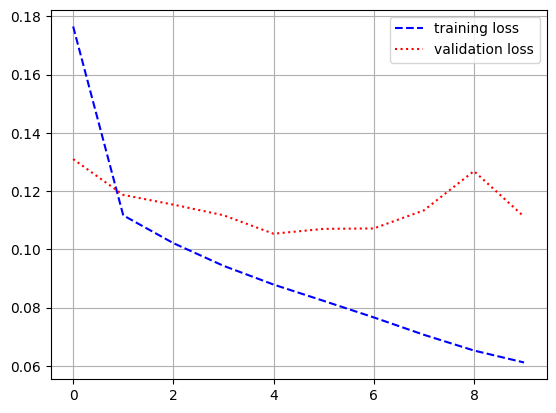

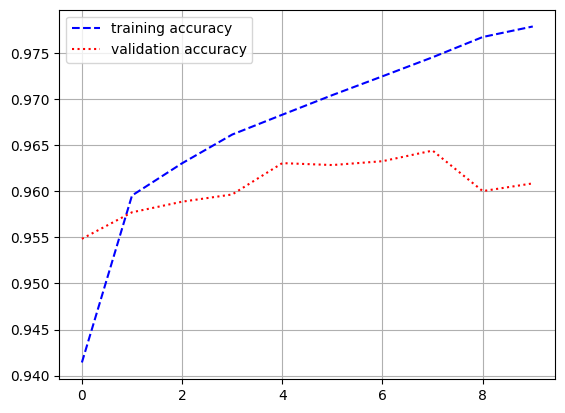

In [ ]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
accuracy = hist_dict['accuracy']
val_acc = hist_dict['val_accuracy']

plt.plot(loss, 'b--',label='training loss')
plt.plot(val_loss, 'r:',label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(accuracy, 'b--',label='training accuracy')
plt.plot(val_acc, 'r:',label='validation accuracy')
plt.legend()
plt.grid()

####  감정예측

In [ ]:
from keras.models import load_model
model.save('NLP.h5')

### predict 방법1

In [ ]:
def sample_data(sentence):
    tokenizer = Tokenizer(char_level=True, oov_token='<OOV>')
    tokenizer.fit_on_texts([sentence])
    encoded = tokenizer.texts_to_sequences([sentence])
    pad_new = pad_sequences(encoded, maxlen = 200)

    predict = model.predict(pad_new)

    score = float(predict)
    print(score)

    if(score > 0.5):
      print("{:.2f}% 확률로 부정 리뷰입니다.".format(score * 100))
    else:
      print("{:.2f}% 확률로 긍정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
sample_data('오늘은 괜찮은 하루였어')

1/1 [==============================] - 0s 353ms/step
0.43978720903396606
56.02% 확률로 긍정 리뷰입니다.


### predict 방법2


In [ ]:
# def sentiment_predict(new_sentence):
#     new_token = [word for word in sample_data(new_sentence) if not word in stopwords]
#     new_sequences = tokenizer.texts_to_sequences([new_token])
#     new_pad = pad_sequences(new_sequences, maxlen=maxlen)


#     # 예측
#     score = float(model.predict(new_pad))  # Accessing the prediction value correctly

#     if score > 0.5:
#       print("{:.2f}%확률로 긍정입니다. \n".format(score * 100))
#     else:
#       print("{:.2f}%확률로 부정입니다. \n".format((1 - score) * 100))